# Assignment 05 - Population
Programming for Data Analytics, Atlantic Technological University
Autumn 2025  
Author: Susan Collins  

## Brief for this assignment

>Part 1 70%
>
>Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.
>
>  -  Weighted mean age (by sex)
>  -  The difference between the sexes by age
>
>This part does not need to look at the regions.
>
>ie You can take the notebook I used in the lectures and substitute the sexes for the regions.

>Part 2 20%
>
>In the same notebook, make a variable that stores an age (say 35).
>
>Write that code that would group the people within 5 years of that age together, into one age group 
>
>Calculate the population difference between the sexes in that age group.

>Part 3 10%
>
>In the same notebook.
>
>Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

## Part 1: Analyse the difference between the sexes, by age, in Ireland.
### Import modules and data

In [486]:
# Import modules
import pandas as pd

In [487]:
# Import data and look at the first few rows
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df = pd.read_csv(url)
df.head(3)

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
0,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,IE0,Ireland,Number,5149139
1,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,61968
2,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1433-13a3-e055-000000000001,Dublin City Council,Number,592713


### Clean data and prepare it for analysis

In [488]:
# Get a list of the column headers in the dataset
headers = df.columns.tolist()

headers

['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'CensusYear',
 'C02199V02655',
 'Sex',
 'C02076V03371',
 'Single Year of Age',
 'C03789V04537',
 'Administrative Counties',
 'UNIT',
 'VALUE']

In [489]:
# cast the population counts as integers
df['VALUE']=df['VALUE'].astype('int64')


In [490]:
# As per Andrew's worked example in lectures, create a list of the columns we 
# are NOT interested in for this analysis, and drop them from the dataframe.
drop_col_list = ['STATISTIC',
                'Statistic Label',
                'TLIST(A1)',
                'CensusYear',
                'C02199V02655',
                'C02076V03371',
                'C03789V04537',
                'UNIT']

df.drop(columns=drop_col_list, inplace=True)

In [491]:
# Look at the data values for Single Year of Age
df["Single Year of Age"].unique()

array(['All ages', 'Under 1 year', '1 year', '2 years', '3 years',
       '4 years', '5 years', '6 years', '7 years', '8 years', '9 years',
       '10 years', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '20 years', '21 years', '22 years', '23 years', '24 years',
       '25 years', '26 years', '27 years', '28 years', '29 years',
       '30 years', '31 years', '32 years', '33 years', '34 years',
       '35 years', '36 years', '37 years', '38 years', '39 years',
       '40 years', '41 years', '42 years', '43 years', '44 years',
       '45 years', '46 years', '47 years', '48 years', '49 years',
       '50 years', '51 years', '52 years', '53 years', '54 years',
       '55 years', '56 years', '57 years', '58 years', '59 years',
       '60 years', '61 years', '62 years', '63 years', '64 years',
       '65 years', '66 years', '67 years', '68 years', '69 years',
       '70 years', '71 years', '72 years', '73 years', '

In [492]:
# Drop the aggregated data for All Ages
df = df[df["Single Year of Age"] != "All ages"]

# Replace the "Under 1" age with a 0
df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0')
# Remove all non-numerical characters from the age column
df['Single Year of Age'] = df['Single Year of Age'].str.replace('\\D', '', regex=True)

# make the ages into integer values
df['Single Year of Age']=df['Single Year of Age'].astype('int64')

# Rename the column to 'Age' in order to simplify later coding
df.rename(columns={'Single Year of Age': 'Age'}, inplace=True)

# Look again at the data values Age, to check it is usable
df["Age"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [493]:
# Look at the data values for Sex
df["Sex"].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [494]:
# Drop the aggregated data for Both Sexes
df = df[df["Sex"] != "Both sexes"]

df["Sex"].unique()

array(['Male', 'Female'], dtype=object)

In [495]:
# Remove the aggregated All Ireland data
df = df[df["Administrative Counties"] != "Ireland"]

In [496]:
# Sanity check - This dataframe should now have all aggregated data removed, 
# so the sum of the VALUE column should equal the total population of the 
# country in 2022 - which was 5,149,139.

df["VALUE"].sum()

5149139

### Weighted Mean Age by Sex, All-Ireland

In [497]:
# create pivot table to sum population across counties
df_stats = pd.pivot_table(df, "VALUE", "Age", "Sex", aggfunc="sum")

# look at the created pivot table
df_stats.head()

Sex,Female,Male
Age,,
0,28186,29610
1,27545,28875
2,28974,30236
3,29483,31001
4,29819,31686


In [498]:
# Weighted mean is sum(age*population at age) / sum (populations at age)

num_male = df_stats["Male"].sum()
num_female = df_stats["Female"].sum()

w_mean_male = (df_stats["Male"] * df_stats.index).sum() / num_male
w_mean_female = (df_stats["Female"] * df_stats.index).sum() / num_female

print(f"The weighted mean age for men is {w_mean_male:.2f}.")
print(f"The weighted mean age for women is {w_mean_female:.2f}.")



The weighted mean age for men is 37.74.
The weighted mean age for women is 38.94.


### The Difference Between the Sexes, By Age

In [499]:
# I already have a table of populations of men and women, by age. 
# I can get the difference between them by arithmetic.
# The clip method will replace values less than 0 
# - found at https://stackoverflow.com/a/37282998

df_stats["Female Excess"] = (df_stats.Female - df_stats.Male).clip(lower=0)
df_stats["Male Excess"] = (df_stats.Male - df_stats.Female).clip(lower=0)

# Look at the calculated figures
df_stats

Sex,Female,Male,Female Excess,Male Excess
Age,,,,
0,28186,29610,0,1424
1,27545,28875,0,1330
2,28974,30236,0,1262
3,29483,31001,0,1518
4,29819,31686,0,1867
...,...,...,...,...
96,956,327,629,0
97,732,217,515,0
98,492,130,362,0


### Plotting the difference between the sexes - the population pyramid

In [500]:
# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

''

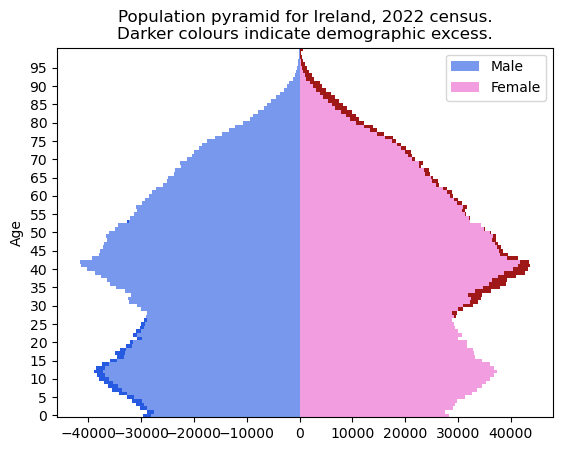

In [501]:
# Plot a classic population pyramid to compare the sexes by age.

# Male population figures are multiplied by -1 to place them on the left of the plot

ax1 = sns.barplot(data = df_stats, 
                x = (df_stats["Male"])*-1, y = df_stats.index, 
                orient='horizontal', width=1, color="#074DFF")
ax2 = sns.barplot(data = df_stats, 
                x = (df_stats["Male"]-df_stats["Male Excess"])*-1, 
                y = df_stats.index, orient='horizontal', 
                width=1, color="#648FFF", label='Male')

ax3 = sns.barplot(data = df_stats, 
                x = (df_stats["Female"]), y = df_stats.index, 
                orient='horizontal', width=1, color="#B70000")
ax4 = sns.barplot(data = df_stats, 
                x = (df_stats["Female"]-df_stats["Female Excess"]), 
                y = df_stats.index, orient='horizontal', 
                width=1, color="#FF8FE9", label="Female")


plt.xticks(ticks=[-40000, -30000, -20000, -10000, 0, 10000, 20000, 30000, 40000])
plt.xlabel("")
xlabels=['40,000','30,000', '20,000', '10,000', '0', '10,000', '20,000', '30,000', '40,000']
plt.yticks(range(0, 100, 5))
ax1.invert_yaxis()
plt.title("Population pyramid for Ireland, 2022 census.\n" \
            "Darker colours indicate demographic excess.")

plt.legend(loc="best")

;


We can see from this population plot that there are more men than women at younger ages, with the trend reversing at approximately age 27. 

If we plot just the excess population in each age bin, we can see this trend more closely:

''

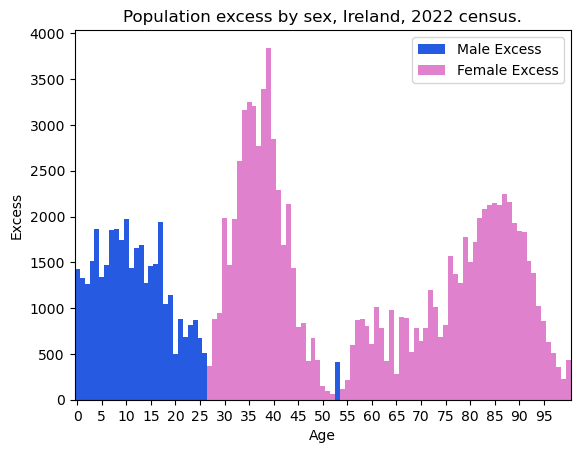

In [502]:
# Plot a bar chart of the excess population by sex, by age.

ax1 = sns.barplot(data = df_stats, 
                y = df_stats["Male Excess"], x = df_stats.index, 
                width=1, color="#074DFF", label='Male Excess')
ax2 = sns.barplot(data = df_stats, 
                y = df_stats["Female Excess"], x = df_stats.index, 
                width=1, color="#F071D7", label='Female Excess')


plt.xticks(range(0, 100, 5))
plt.ylabel("Excess")

plt.title("Population excess by sex, Ireland, 2022 census.")
plt.legend(loc="best")

;


In this plot of just the excess populations, we can see even more clearly that there are more men in the age range below 27; there are more women above this age with particular peaks at ages 30-45 and ages 75-95, except for an isolated spike in the male population at age 57.

## Part 2: Calculate the population difference between the sexes in a specified age group

In [503]:
# Create variable to store the age in which we are interested.
age_of_interest = 35

# From Part 1, I already have an object with male and female populations by age:
df_stats.head()

Sex,Female,Male,Female Excess,Male Excess
Age,,,,
0,28186,29610,0,1424
1,27545,28875,0,1330
2,28974,30236,0,1262
3,29483,31001,0,1518
4,29819,31686,0,1867


In [504]:
# Write the code that groups the people within 5 years of that age together, into one age group.

# Count the women and men in the range of interest

count_women_in_interval = df_stats.Female.iloc[age_of_interest-5:age_of_interest+5].sum()

count_men_in_interval = df_stats.Male.iloc[age_of_interest-5:age_of_interest+5].sum()

# Print results
print(f"You have chosen to look at the population of Ireland, in 2022, aged within 5 years of the age {age_of_interest}.")
print(f"There are {count_women_in_interval} women and {count_men_in_interval} men in this age range.")

if (count_women_in_interval > count_men_in_interval):
    print(f"There are more women that men in this range, the difference is +{count_women_in_interval - count_men_in_interval}.")
elif (count_men_in_interval > count_women_in_interval):
    print(f"There are more women that men in this range, the difference is +{count_men_in_interval - count_women_in_interval}.")
else:
    print("Surprisingly, there are exactly the same number of men and women in this interval.")

You have chosen to look at the population of Ireland, in 2022, aged within 5 years of the age 35.
There are 371363 women and 343729 men in this age range.
There are more women that men in this range, the difference is +27634.


## Part 3: Which region in Ireland has the biggest population difference between the sexes in that age group?

In [505]:
# To perform this analysis, we go back to our cleaned dataframe containing population data by age, sex and administrative county.

df.head

<bound method NDFrame.head of          Sex  Age                Administrative Counties  VALUE
3297    Male    0                  Carlow County Council    346
3298    Male    0                    Dublin City Council   3188
3299    Male    0  Dún Laoghaire Rathdown County Council   1269
3300    Male    0                  Fingal County Council   2059
3301    Male    0            South Dublin County Council   1855
...      ...  ...                                    ...    ...
9787  Female  100               Roscommon County Council      7
9788  Female  100                   Sligo County Council      9
9789  Female  100                   Cavan County Council     12
9790  Female  100                 Donegal County Council     31
9791  Female  100                Monaghan County Council      7

[6262 rows x 4 columns]>

In [506]:
# We create a new dataframe containing the subsection of data for the age range we are interested in.

df_interval = df[((df.Age - age_of_interest).abs() <=5)]

# Look at this new data subsection
df_interval

,Sex,Age,Administrative Counties,VALUE
4257,Male,30,Carlow County Council,367
4258,Male,30,Dublin City Council,6163
4259,Male,30,Dún Laoghaire Rathdown County Council,1511
4260,Male,30,Fingal County Council,1888
4261,Male,30,South Dublin County Council,1819
...,...,...,...,...
7867,Female,40,Roscommon County Council,556
7868,Female,40,Sligo County Council,538
7869,Female,40,Cavan County Council,630
7870,Female,40,Donegal County Council,1293


In [507]:
# Now, create a new pivot table to sum the population by sex in each administrative county.
df_interval_stats = pd.pivot_table(df_interval, values="VALUE", 
                                    index="Administrative Counties",
                                    columns="Sex", aggfunc="sum")

# Look at pivot table
df_interval_stats.head()

Sex,Female,Male
Administrative Counties,,
Carlow County Council,4774,4451
Cavan County Council,6150,5776
Clare County Council,8896,8085
Cork City Council,19750,18812
Cork County Council,26545,23706


In [508]:
# Add column to hold the calculated population difference between the sexes for each administrative county. 

df_interval_stats["Abs_Difference"] = (df_interval_stats.Female - df_interval_stats.Male).abs()

#look at the new column
df_interval_stats.head()

Sex,Female,Male,Abs_Difference
Administrative Counties,,,
Carlow County Council,4774,4451,323
Cavan County Council,6150,5776,374
Clare County Council,8896,8085,811
Cork City Council,19750,18812,938
Cork County Council,26545,23706,2839


In [509]:
# Sort the data by the population difference, largest first. 
df_interval_stats.sort_values("Abs_Difference", ascending=False, inplace=True)

# Get the first index value, which is the county name
region = df_interval_stats.index[0]
# Get the population difference in that county
region_difference = df_interval_stats.loc[region,"Abs_Difference"]

# Print results
print(f"You have chosen to look at the population of Ireland, in 2022, "
        f"aged within 5 years of the age {age_of_interest}.")
print(f"The administrative county with the largest population difference by "
    f"sex, in your chosen age interval, is {region}, with a population "
    f"difference of {region_difference}.")

You have chosen to look at the population of Ireland, in 2022, aged within 5 years of the age 35.
The administrative county with the largest population difference by sex, in your chosen age interval, is Fingal County Council, with a population difference of 2942.
